# Task - Perform Exploratory Data Analysis on the dataset to identify interesting insights from this dataset.

dataset link - https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Reading and general analysis of data

In [ ]:
data = pd.read_csv('fake_job_postings.csv', index_col=0)
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17880 entries, 1 to 17880
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [ ]:
data.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.shape

(17880, 17)

In [ ]:
data.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
data.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

## Analysis of each column

In [ ]:
# analysis of the title column
data.title

job_id
1                                         Marketing Intern
2                Customer Service - Cloud Video Production
3                  Commissioning Machinery Assistant (CMA)
4                        Account Executive - Washington DC
5                                      Bill Review Manager
                               ...                        
17876                     Account Director - Distribution 
17877                                   Payroll Accountant
17878    Project Cost Control Staff Engineer - Cost Con...
17879                                     Graphic Designer
17880                           Web Application Developers
Name: title, Length: 17880, dtype: object

In [ ]:
data.title.unique()

array(['Marketing Intern', 'Customer Service - Cloud Video Production',
       'Commissioning Machinery Assistant (CMA)', ...,
       'Senior Financial Analyst (Retail) ',
       'Account Director - Distribution ',
       'Project Cost Control Staff Engineer - Cost Control Exp - TX'],
      dtype=object)

In [ ]:
len(data.title.unique())

11231

In [ ]:
data.title.str.lower().value_counts()

english teacher abroad                                         311
customer service associate                                     146
graduates: english teacher abroad (conversational)             144
english teacher abroad                                          95
software engineer                                               88
                                                              ... 
market specialists                                               1
lead hardware engineer                                           1
information systems support specialist                           1
commerical and operations manager                                1
project cost control staff engineer - cost control exp - tx      1
Name: title, Length: 11020, dtype: int64

<Axes: >

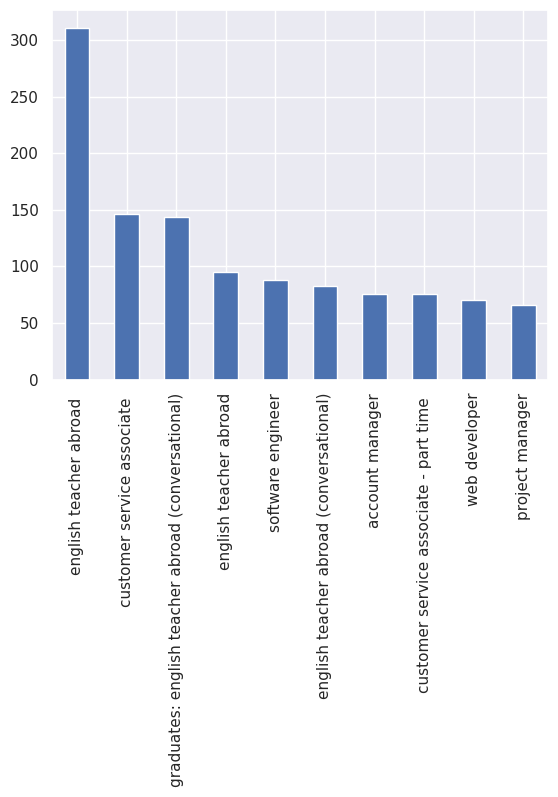

In [ ]:
sns.set(style='darkgrid')
data.title.str.lower().value_counts().head(10).plot(kind='bar')

In [ ]:
def preprocess_title(title):
  delete_words = ['jr', 'sr', 'lead', 'director', 'president', 'graduates', 'conversational', 'needed', 'part time', 'abroad', 'work from home', 'urgent', 'wanted', 'available']
  title = title.lower()
  for word in delete_words:
    title = title.replace(word, '')
  title = re.sub(r'[^\w\s\d]', '', title)
  title = title.strip()
  return title

In [ ]:
data['title'] = data['title'].apply(preprocess_title)

In [ ]:
len(data.title.unique())

10423

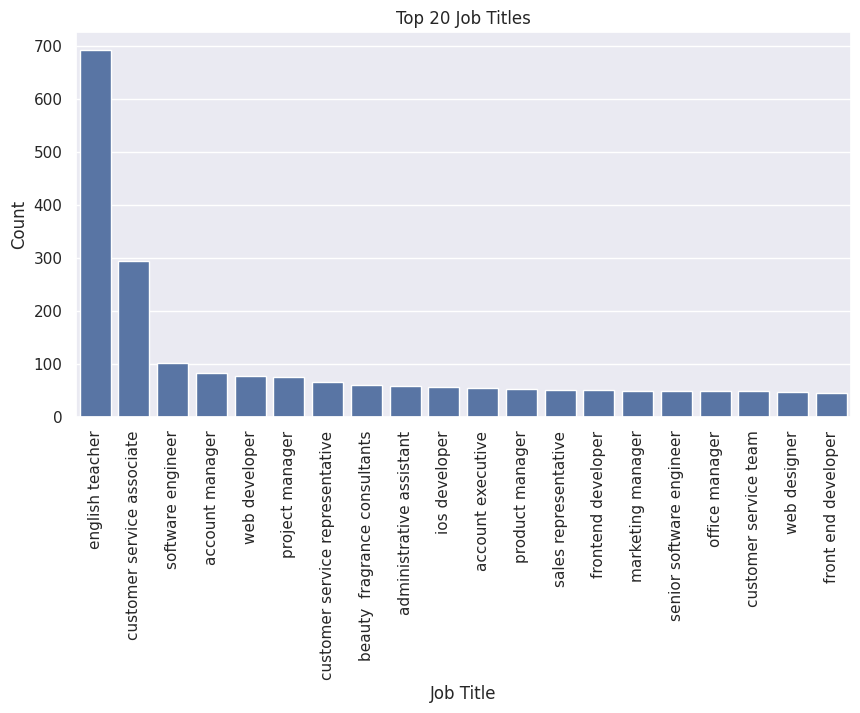

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data.title.value_counts().head(20))
plt.xticks(rotation=90)
plt.title('Top 20 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the location column
data['country'] = data.location.str.split(',').str[0]
data['country']

job_id
1        US
2        NZ
3        US
4        US
5        US
         ..
17876    CA
17877    US
17878    US
17879    NG
17880    NZ
Name: country, Length: 17880, dtype: object

In [ ]:
data['country'].unique()

array(['US', 'NZ', 'DE', 'GB', 'AU', 'SG', 'IL', 'AE', 'CA', 'IN', 'EG',
       'PL', 'GR', nan, 'PK', 'BE', 'BR', 'SA', 'DK', 'RU', 'ZA', 'CY',
       'HK', 'TR', 'IE', 'LT', 'JP', 'NL', 'AT', 'KR', 'FR', 'EE', 'TH',
       'PA', 'KE', 'MU', 'MX', 'RO', 'MY', 'FI', 'CN', 'ES', 'SE', 'CL',
       'UA', 'QA', 'IT', 'LV', 'IQ', 'BG', 'PH', 'CZ', 'VI', 'MT', 'HU',
       'BD', 'KW', 'LU', 'NG', 'RS', 'BY', 'VN', 'ID', 'ZM', 'NO', 'BH',
       'UG', 'CH', 'TT', 'SD', 'SK', 'AR', 'TW', 'PT', 'PE', 'CO', 'IS',
       'SI', 'MA', 'AM', 'TN', 'GH', 'AL', 'HR', 'CM', 'SV', 'NI', 'LK',
       'JM', 'KZ', 'KH'], dtype=object)

In [ ]:
data.country.fillna('Unknown', inplace=True)

In [ ]:
data['state'] = data.location.str.split(',').str[1].str.strip()
data['state']

job_id
1        NY
2          
3        IA
4        DC
5        FL
         ..
17876    ON
17877    PA
17878    TX
17879    LA
17880     N
Name: state, Length: 17880, dtype: object

In [ ]:
data['state'].unique()

array(['NY', '', 'IA', 'DC', 'FL', 'MD', 'BE', 'CA', 'AZ', 'NJ', 'LND',
       'CT', 'NSW', '01', 'SOS', 'PA', 'TX', 'N', 'MO', 'ON', 'MA', 'KS',
       'WA', 'AP', 'IL', nan, 'OK', 'NE', 'C', 'TN', 'OH', 'NH', 'NV',
       'MN', 'I', 'DU', 'GA', 'KY', 'NC', 'SC', 'MB', 'WAR', 'IN', 'OR',
       'WLV', 'BIR', 'BY', 'CO', 'MAN', 'TA', 'VA', 'AL', 'WI', 'MI',
       'SD', 'CMD', 'QLD', 'UT', 'RDG', 'AR', 'E', 'MP', 'ME', 'RJ', 'AB',
       'MT', 'DNC', 'LIN', 'LDS', 'MOW', 'SOM', 'EC', 'GBN', 'ESS', 'ENG',
       'WSM', '34', 'BRU', 'NT', 'L', 'BC', 'VIC', 'QC', 'VL', '13', 'MH',
       'UKM', '5', 'HCK', 'ISL', 'U', 'M', 'DE', 'SHF', '37', 'WKF', '10',
       'NM', 'WV', '8', 'NL', '110', 'ABD', 'RI', 'SK', 'HAM', 'LA', 'QB',
       'RIC', 'ANT', 'ND', 'J', 'NB', 'DIF', 'B', 'WY', 'HRY', 'WC', 'ID',
       '84', 'VOV', 'NW', 'CMA', 'IS', 'SWD', 'UP', 'GT', 'ABE', 'LCE',
       'SFK', 'HRT', '71', 'CAM', 'G', 'SRY', 'NYK', 'NBL', '25', 'ZH',
       'HR', 'LAN', 'PW', 'KIR', 'RIX', 'AK', 

In [ ]:
data.state.fillna('Unknown', inplace=True)

In [ ]:
data.loc[data['state'] == '', 'state'] = 'Unknown'

In [ ]:
data['city'] = data.location.str.split(',').str[2].str.strip().str.title()
data['city']

job_id
1            New York
2            Auckland
3               Wever
4          Washington
5          Fort Worth
             ...     
17876         Toronto
17877    Philadelphia
17878         Houston
17879           Lagos
17880      Wellington
Name: city, Length: 17880, dtype: object

In [ ]:
data.loc[data['city'] == '', 'city'] = 'Unknown'

In [ ]:
data['city'].nunique()

2026

In [ ]:
data.city.fillna('Unknown', inplace=True)

In [ ]:
data.drop('location', axis=1, inplace=True)

In [ ]:
data.head()

,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
job_id,,,,,,,,,,,,,,,,,,,
1,marketing intern,Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
2,customer service cloud video production,Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,Unknown,Auckland
3,commissioning machinery assistant cma,NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
4,account executive washington dc,Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
5,bill review manager,NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


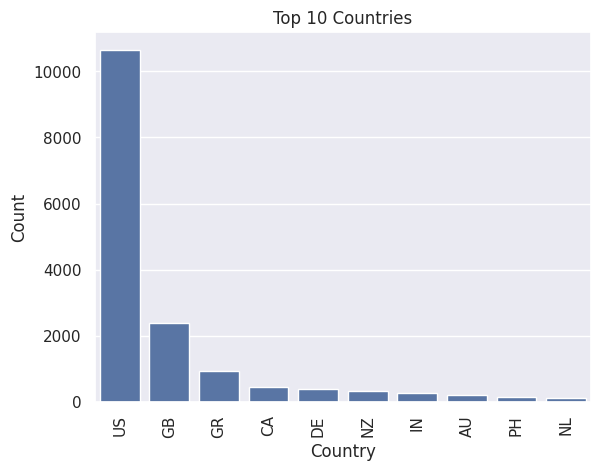

In [ ]:
sns.barplot(data.loc[data['country'] != 'Unknown'].country.value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

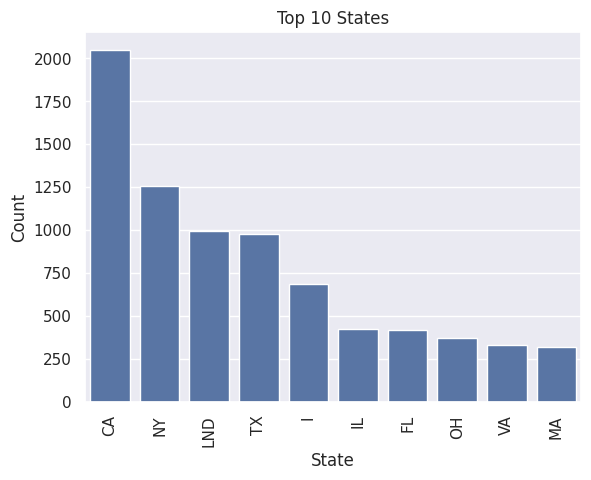

In [ ]:
sns.barplot(data.loc[data['state'] != 'Unknown'].state.value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

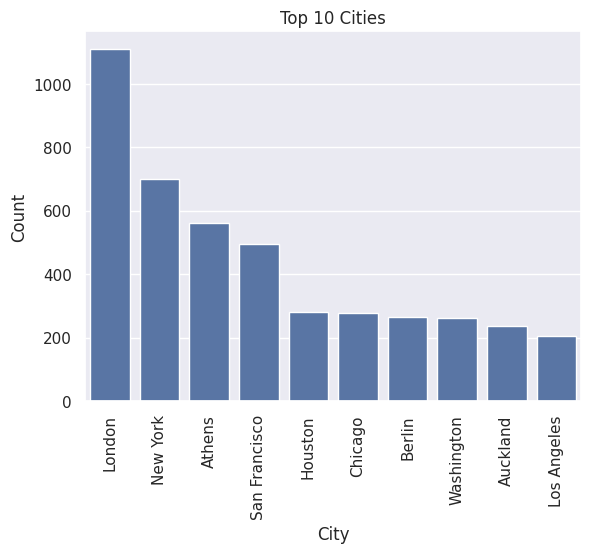

In [ ]:
sns.barplot(data.loc[data['city'] != 'Unknown'].city.value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the department column
data.department.nunique()

1337

In [ ]:
data.department.isna().sum()

11547

In [ ]:
data.department.fillna('Unknown', inplace=True)

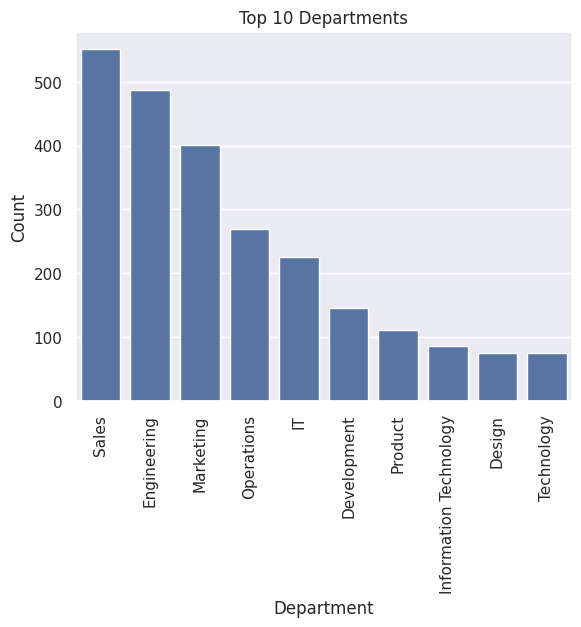

In [ ]:
sns.barplot(data[data['department']!='Unknown'].department.value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the salary range column
data.salary_range.unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '1300

In [ ]:
data.salary_range.isna().sum()

15012

In [ ]:
data.salary_range.fillna('Unknown-Unknown', inplace=True)

In [ ]:
for i in range(len(data)):
  try:
    min = int(data.loc[i, 'salary_range'].split('-')[0])
    max = int(data.loc[i, 'salary_range'].split('-')[1])
  except:
    data.loc[i, 'salary_range'] = 'Unknown-Unknown'

In [ ]:
data['min_salary'] = data.salary_range.str.split('-').str[0].str.strip()

In [ ]:
data['max_salary'] = data.salary_range.str.split('-').str[1].str.strip()

In [ ]:
# analysis of the company_profile column

In [ ]:
data.company_profile.isna().sum()

3309

In [ ]:
data.company_profile.fillna('Unknown', inplace=True)

In [ ]:
stopwords = set(stopwords.words('english'))

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = re.sub(r'\s+', ' ', text)
  text = text.split()
  text = [word for word in text if word not in stopwords]
  text = ' '.join(text)
  return text

In [ ]:
data['company_profile'] = data['company_profile'].apply(preprocess_text)

In [ ]:
all_words = data['company_profile'].str.split().explode()

In [ ]:
all_words.value_counts()

team              7048
work              6929
services          6644
company           6511
people            6191
                  ... 
publicitaria         1
comunicaciones       1
especializa          1
identificacin        1
workflowsthat        1
Name: company_profile, Length: 17800, dtype: int64

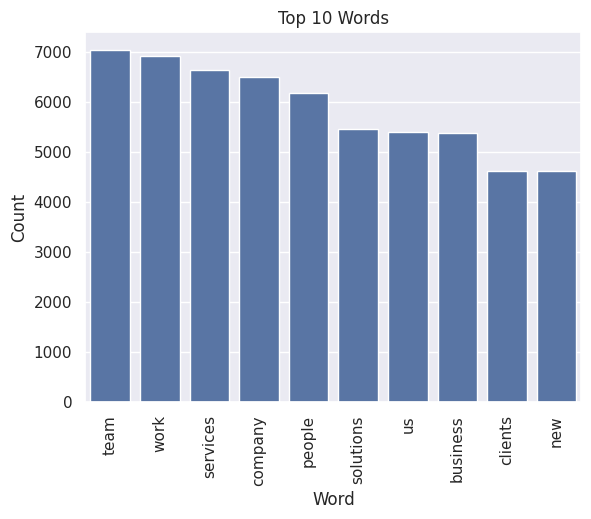

In [ ]:
sns.barplot(all_words.value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the description column
data.description.isna().sum()

2

In [ ]:
data.description.fillna('Unknown', inplace=True)

In [ ]:
data['description'] = data['description'].apply(preprocess_text)

In [ ]:
all_words_description = data['description'].str.split().explode()

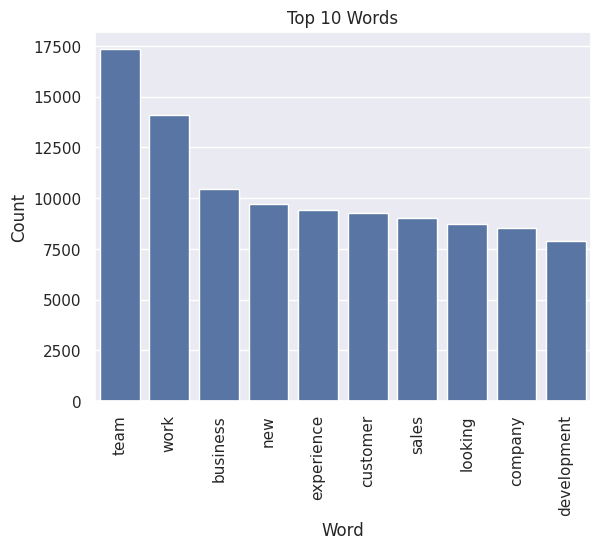

In [ ]:
sns.barplot(all_words_description.value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the requirements column
data.requirements.fillna('Unknown', inplace=True)
data['requirements'] = data['requirements'].apply(preprocess_text)

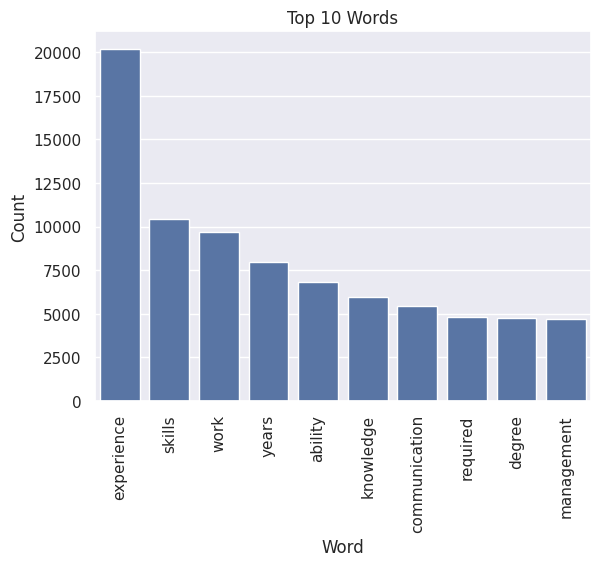

In [ ]:
sns.barplot(data['requirements'].str.split().explode().value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the benefits column
data.benefits.fillna('Unknown', inplace=True)
data['benefits'] = data['benefits'].apply(preprocess_text)

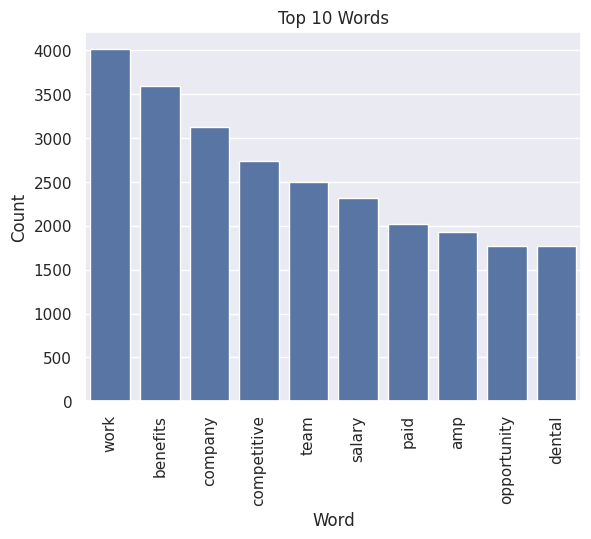

In [ ]:
sns.barplot(data[data['benefits']!='unknown']['benefits'].str.split().explode().value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

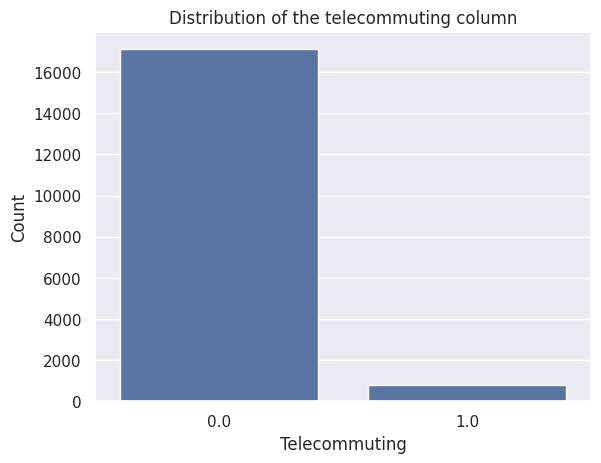

In [ ]:
# analysis of the telecommuting column
sns.barplot(data.telecommuting.value_counts())
plt.title('Distribution of the telecommuting column')
plt.xlabel('Telecommuting')
plt.ylabel('Count')
plt.show()

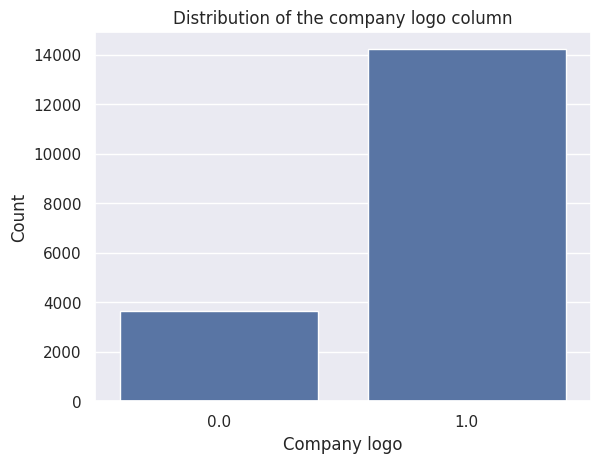

In [ ]:
# analysis of the has_company_logo column
sns.barplot(data.has_company_logo.value_counts())
plt.title('Distribution of the company logo column')
plt.xlabel('Company logo')
plt.ylabel('Count')
plt.show()

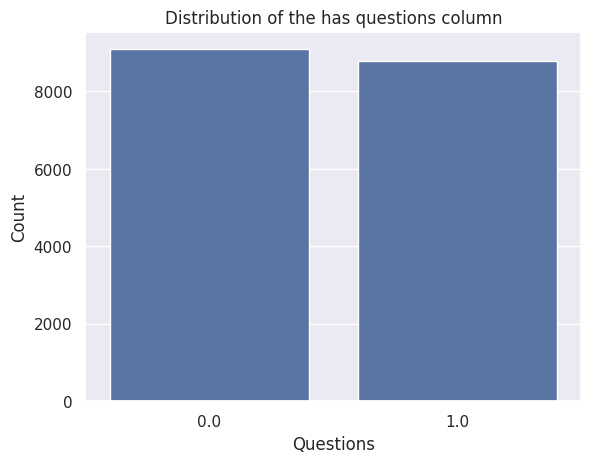

In [ ]:
# analysis of the has_questions column
sns.barplot(data.has_questions.value_counts())
plt.title('Distribution of the has questions column')
plt.xlabel('Questions')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the employment_type column
data.employment_type.value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [ ]:
data.employment_type.isna().sum()

3472

In [ ]:
data.employment_type.fillna('Unknown', inplace=True)

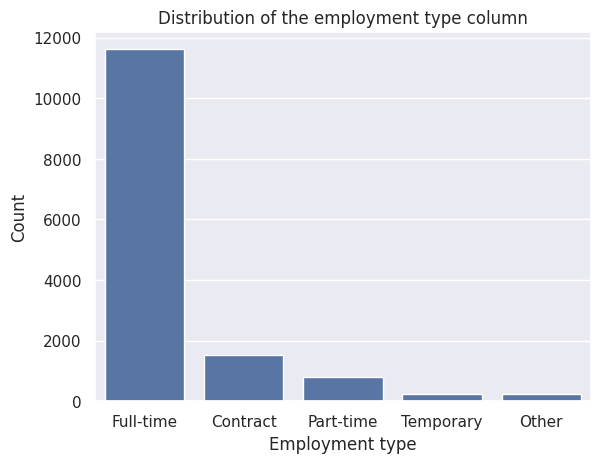

In [ ]:
sns.barplot(data[data['employment_type']!='Unknown'].employment_type.value_counts())
plt.title('Distribution of the employment type column')
plt.xlabel('Employment type')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the required_experience column
data.required_experience.value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

In [ ]:
data.required_experience.isna().sum()

7051

In [ ]:
data.required_experience.fillna('Unknown', inplace=True)

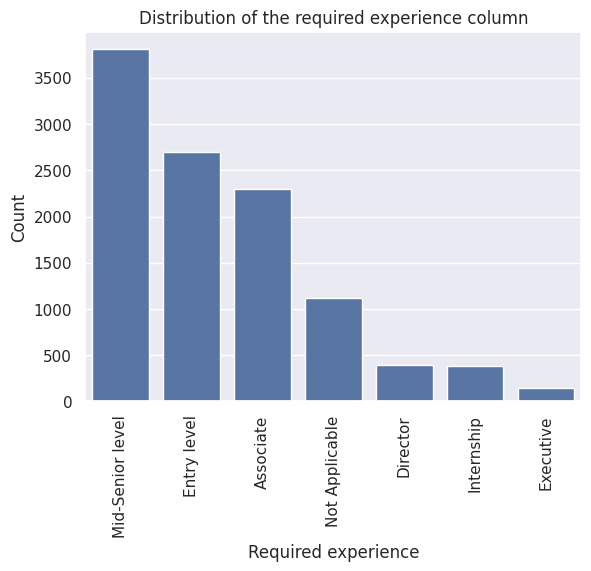

In [ ]:
sns.barplot(data[data['required_experience'] != 'Unknown'].required_experience.value_counts())
plt.xticks(rotation=90)
plt.title('Distribution of the required experience column')
plt.xlabel('Required experience')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the required_education column
data.required_education.value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [ ]:
data.required_education.isna().sum()

8106

In [ ]:
data.required_education.fillna('Unknown', inplace=True)

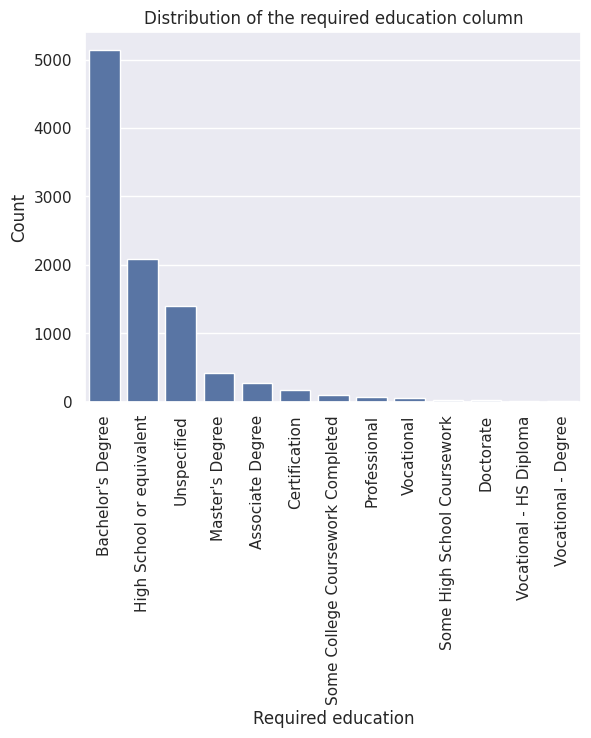

In [ ]:
sns.barplot(data[data['required_education'] != 'Unknown'].required_education.value_counts())
plt.xticks(rotation=90)
plt.title('Distribution of the required education column')
plt.xlabel('Required education')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the industry column
data.industry.value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [ ]:
data.industry.isna().sum()

4904

In [ ]:
data.industry.fillna('Unknown', inplace=True)

In [ ]:
data.industry = data.industry.apply(preprocess_text)

In [ ]:
data[data['industry']!='unknown'].industry.str.split().explode().value_counts().head(10)

services       3198
information    1762
technology     1734
computer       1590
software       1376
internet       1062
management     1034
education       839
advertising     828
marketing       828
Name: industry, dtype: int64

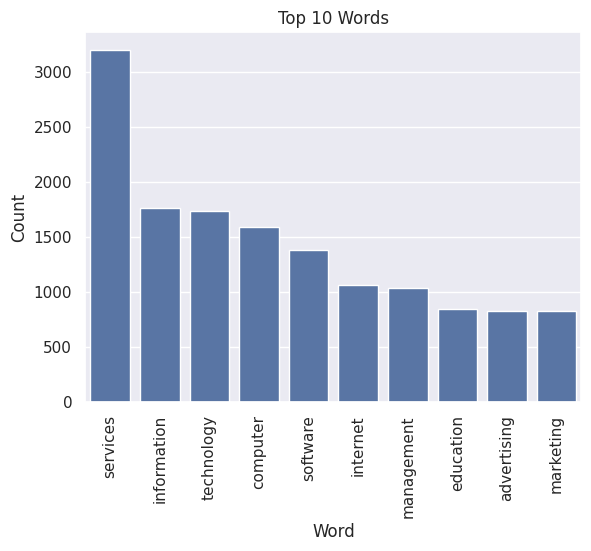

In [ ]:
sns.barplot(data[data['industry']!='unknown'].industry.str.split().explode().value_counts().head(10))
plt.xticks(rotation=90)
plt.title('Top 10 Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [ ]:
# analysis of the function column
data.function.value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [ ]:
data.function.isna().sum()

6456

In [ ]:
data.function.fillna('Unknown', inplace=True)

In [ ]:
# analysis of the fraudulent column
data.fraudulent.value_counts()

0.0    17014
1.0      866
Name: fraudulent, dtype: int64

##Analysis of the relationship between variables and the target variable

In [ ]:
data.head()

,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,...,required_experience,required_education,industry,function,fraudulent,country,state,city,min_salary,max_salary
job_id,,,,,,,,,,,,,,,,,,,,,
1,marketing intern,Marketing,Unknown-Unknown,food52 weve created groundbreaking awardwinnin...,food52 fastgrowing james beard awardwinning on...,experience content management systems major pl...,unknown,0.0,1.0,0.0,...,Internship,Unknown,unknown,Marketing,0.0,US,NY,New York,Unknown,Unknown
2,customer service cloud video production,Success,Unknown-Unknown,90 seconds worlds cloud video production servi...,organised focused vibrant awesomedo passion cu...,expect youyour key responsibility communicate ...,get usthrough part 90 seconds team gainexperie...,0.0,1.0,0.0,...,Not Applicable,Unknown,marketing advertising,Customer Service,0.0,NZ,Unknown,Auckland,Unknown,Unknown
3,commissioning machinery assistant cma,Unknown,Unknown-Unknown,valor services provides workforce solutions me...,client located houston actively seeking experi...,implement precommissioning commissioning proce...,unknown,0.0,1.0,0.0,...,Unknown,Unknown,unknown,Unknown,0.0,US,IA,Wever,Unknown,Unknown
4,account executive washington dc,Sales,Unknown-Unknown,passion improving quality life geography heart...,company esri environmental systems research in...,education bachelors masters gis business admin...,culture anything corporatewe collaborative cre...,0.0,1.0,0.0,...,Mid-Senior level,Bachelor's Degree,computer software,Sales,0.0,US,DC,Washington,Unknown,Unknown
5,bill review manager,Unknown,Unknown-Unknown,spotsource solutions llc global human capital ...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefits offered,0.0,1.0,1.0,...,Mid-Senior level,Bachelor's Degree,hospital health care,Health Care Provider,0.0,US,FL,Fort Worth,Unknown,Unknown


In [ ]:
# analysis of the relationship between title and fraudulent
data.groupby('fraudulent')['title'].value_counts()

fraudulent  title                                   
0.0         english teacher                             691
            customer service associate                  294
            software engineer                           102
            account manager                              81
            project manager                              76
                                                       ... 
1.0         weekly cash jobs hiring  workers              1
            weekly jobs  workers required                 1
            well paid cash jobs to start immediately      1
            well test operator                            1
            workers   jobs                                1
Name: title, Length: 10502, dtype: int64

In [ ]:
data.groupby('fraudulent')['title'].value_counts()[0].sort_values(ascending=False).head(10)

title
english teacher                  691
customer service associate       294
software engineer                102
account manager                   81
project manager                   76
web developer                     76
beauty  fragrance consultants     61
ios developer                     57
account executive                 54
product manager                   53
Name: title, dtype: int64

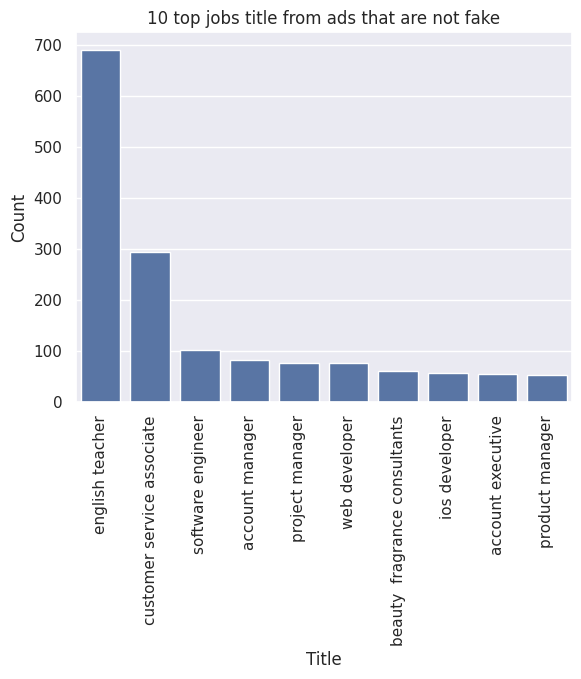

In [ ]:
sns.barplot(data.groupby('fraudulent')['title'].value_counts()[0].sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('10 top jobs title from ads that are not fake')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

In [ ]:
data.groupby('fraudulent')['title'].value_counts()[1].sort_values(ascending=False).head(10)

title
administrative assistant                                           21
data entry adminclerical positions                                 21
home based payroll typistdata entry clerks positions               21
cruise staff                                                       21
customer service representative                                    19
home based payroll data entry clerk position  earn 100200 daily    12
data entry                                                         11
payroll clerk                                                      11
account sales managers 80130000yr                                  10
network marketing                                                  10
Name: title, dtype: int64

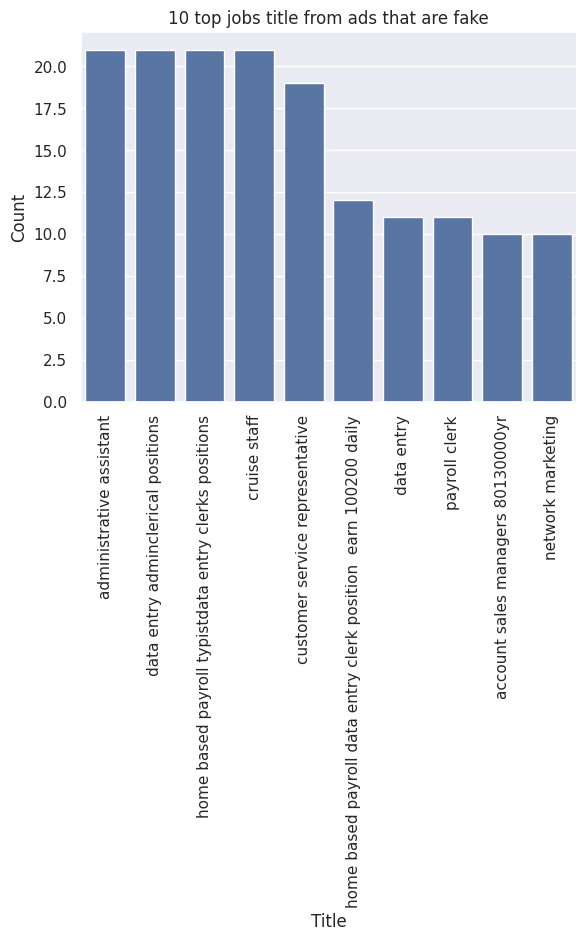

In [ ]:
sns.barplot(data.groupby('fraudulent')['title'].value_counts()[1].sort_values(ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('10 top jobs title from ads that are fake')
plt.xlabel('Title')
plt.ylabel('Count')
plt.show()

###Observations and Conclusion:

1. Specificity: Genuine titles tend to be specific to professions or industries such as teaching, software development, management roles, etc. They reflect typical job titles in various sectors.

2. Vagueness and Promises: Fake titles often include vague descriptions, promising high earnings, or focusing on generic administrative tasks like data entry and clerical work. They may also emphasize "work from home" opportunities and easy earnings, which can raise suspicions regarding their authenticity.

3. Job Market Trends: Genuine titles reflect roles that are commonly sought after and established in the job market. They align with professional domains where specific skills and qualifications are required.

4. Potential Scams: Titles like "network marketing" and exaggerated earning potentials ($80,130,000/yr) raise red flags for potential scams or pyramid schemes rather than legitimate job opportunities.


In [ ]:
# analysis of the relationship between department and fraudulent
data.groupby('fraudulent')['department'].value_counts()

fraudulent  department            
0.0         Unknown                   11017
            Sales                       539
            Engineering                 441
            Marketing                   399
            Operations                  270
                                      ...  
1.0         User experience design        1
            WWAREHOUSE ASSOCIATE          1
            biotech                       1
            hr                            1
            reception                     1
Name: department, Length: 1373, dtype: int64

In [ ]:
data.groupby('fraudulent')['department'].value_counts()[0].sort_values(ascending=False).head(10)

department
Unknown        11017
Sales            539
Engineering      441
Marketing        399
Operations       270
IT               224
Development      146
Product          112
Design            76
Technology        75
Name: department, dtype: int64

In [ ]:
data.groupby('fraudulent')['department'].value_counts()[1].sort_values(ascending=False).head(50)

department
Unknown                              531
Engineering                           46
Clerical                              27
Oil & Energy                          24
Information Technology                15
Administrative                        14
Customer Service                      14
Information Technology                12
Sales                                 12
Engineering                            9
admin                                  7
Accounting/Payroll                     6
CALL CENTER                            5
ENGINEERING                            5
Sales and Research                     5
sales                                  5
Oil & Energy                           4
customer service                       4
Maintenance                            4
Account                                4
Admin/Clerical                         3
CSR                                    3
CSR CENTER                             3
Controls Engineer                      3
Data 

###Observations and Conclusion:

1. Specificity and Clarity: Genuine departments are typically clear and specific, such as Sales, Engineering, Marketing, and IT. They represent established functional areas within organizations.

2. Unusual or Generic Descriptions: Fake departments often include generic terms like Clerical, Administrative, and Customer Service, which could be associated with a wide range of tasks and lack specificity.

3. Potential Scams: Some departments, such as Work at home, CALL CENTER, and Administration support, may indicate potential scams or job postings with dubious intentions, especially if they promise high earnings or lack clear job descriptions.

4. Unusual or Uncommon Departments: Departments like MAIL UNIT 65036, biotech, and Power Plant & Energy seem unusual or uncommon in standard job postings and could raise suspicions regarding the authenticity of the job opportunities associated with them.

In [ ]:
# analysis of the relationship between company_profile and fraudulent
profile_fake = data.loc[data['fraudulent'] == 1]
profile_real = data.loc[data['fraudulent'] == 0]

In [ ]:
profile_fake.company_profile.str.split().explode().value_counts().head(15)

unknown         587
candidates      195
services        173
recruiting      163
business        149
bonus           147
solutions       134
staffing        128
new             127
experience      118
products        114
professional    113
technology      113
signing         112
referral        112
Name: company_profile, dtype: int64

In [ ]:
profile_real.company_profile.str.split().explode().value_counts().head(15)

team          6989
work          6917
services      6471
company       6418
people        6109
us            5352
solutions     5319
business      5229
clients       4530
new           4486
companies     4278
help          4224
amp           3938
technology    3769
time          3233
Name: company_profile, dtype: int64

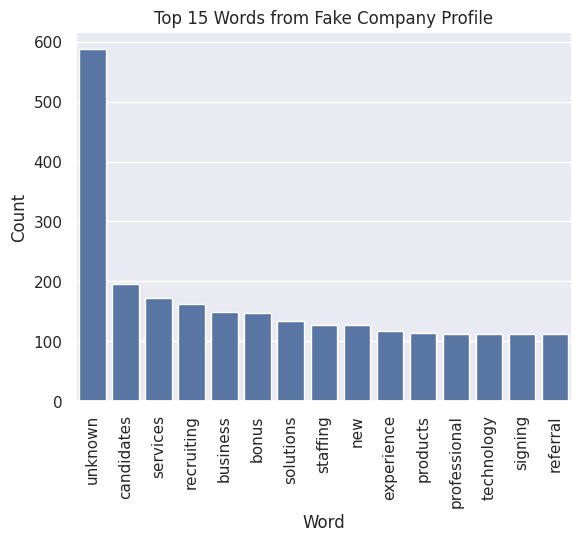

In [ ]:
sns.barplot(profile_fake.company_profile.str.split().explode().value_counts().head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Words from Fake Company Profile')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

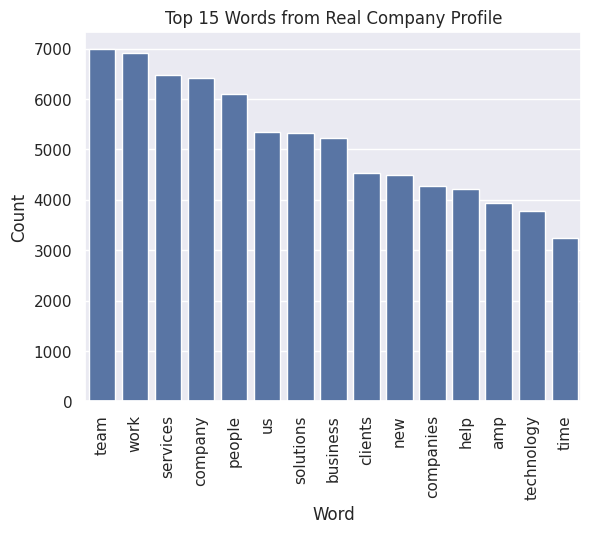

In [ ]:
sns.barplot(profile_real.company_profile.str.split().explode().value_counts().head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Words from Real Company Profile')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

###Based on the analysis of company descriptions:

1. Job postings lacking any description or with minimal information, often marked as "unknown," could potentially be fake.
2. Listings without meaningful content should raise red flags and prompt further investigation.
3. Genuine company profiles provide insight into the company's culture, values, and services offered.
4. Lack of transparency or meaningful content in company descriptions may indicate potential scams or fraudulent job offers.
5. Job seekers should thoroughly research companies and positions to avoid falling victim to deceptive job postings.



In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_text = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in profile_fake.company_profile.str.split().values]
dictionary = corpora.Dictionary(lemmatized_text)
corpus = [dictionary.doc2bow(text) for text in lemmatized_text]
num_topics = 2
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.053*"unknown" + 0.021*"candidate" + 0.019*"bonus" + 0.015*"recruiting" + 0.012*"referral" + 0.012*"staffing" + 0.011*"new" + 0.010*"signing" + 0.010*"professional" + 0.010*"aptitude"
Topic: 1 
Words: 0.018*"business" + 0.017*"service" + 0.011*"product" + 0.010*"technology" + 0.010*"financing" + 0.009*"people" + 0.009*"company" + 0.009*"solution" + 0.008*"system" + 0.008*"accion"


In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatized_text = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in profile_real.company_profile.str.split().values]
dictionary = corpora.Dictionary(lemmatized_text)
corpus = [dictionary.doc2bow(text) for text in lemmatized_text]
num_topics = 2
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"team" + 0.010*"company" + 0.009*"people" + 0.009*"work" + 0.008*"home" + 0.007*"customer" + 0.006*"product" + 0.005*"service" + 0.005*"new" + 0.005*"one"
Topic: 1 
Words: 0.020*"service" + 0.012*"client" + 0.012*"solution" + 0.012*"company" + 0.009*"business" + 0.007*"amp" + 0.007*"unknown" + 0.007*"management" + 0.006*"provide" + 0.006*"customer"


###Key Differences:

1. Fake job advertisements tend to focus more on recruitment-related terms, bonuses, and incentives, as indicated by Topic 0.
2. Real job advertisements, on the other hand, emphasize aspects like teamwork, company culture, and customer service, as seen in Topic 0 for real ads.
3. Additionally, the language used in real job advertisements reflects a more genuine tone, focusing on providing solutions and services to clients (Topic 1 for real ads).

In [ ]:
# analysis of the relationship between description and fraudulent
profile_fake.description.str.split().explode().value_counts().head(15)

work           954
amp            596
team           479
position       459
experience     459
management     450
project        442
business       429
company        427
customer       424
looking        413
skills         397
service        394
support        353
engineering    353
Name: description, dtype: int64

In [ ]:
profile_real.description.str.split().explode().value_counts().head(15)

team           16864
work           13129
business       10011
new             9373
experience      8974
sales           8837
customer        8836
looking         8301
company         8084
development     7670
product         6881
management      6765
marketing       6440
service         6264
support         5886
Name: description, dtype: int64

While both fake and real job descriptions share some common terms like "team" and "work", real job descriptions tend to include a wider range of job-specific terms related to business development, sales, and marketing, reflecting genuine hiring needs and company operations. Conversely, fake job descriptions may contain more generic terms that could be used to attract applicants without providing substantial job details.

In [ ]:
# analysis of the relationship between requirements and fraudulent
profile_fake.requirements.str.split().explode().value_counts().head(15)

experience       807
skills           588
work             451
ability          351
years            309
knowledge        247
amp              244
must             228
communication    216
computer         190
required         189
management       186
degree           168
able             166
office           161
Name: requirements, dtype: int64

In [ ]:
profile_real.requirements.str.split().explode().value_counts().head(15)

experience       19370
skills            9833
work              9254
years             7634
ability           6470
knowledge         5701
communication     5216
required          4628
degree            4585
management        4533
working           4518
team              4315
development       3991
business          3902
design            3583
Name: requirements, dtype: int64

In conclusion, while both fake and real job requirements share some common terms like "experience" and "skills", real job requirements tend to include more specific and detailed qualifications related to the job role. Fake job requirements may include more generic terms, lacking specificity and detail, and could be designed to attract applicants without specifying actual job requirements.

In [ ]:
# analysis of the relationship between benefits and fraudulent
profile_fake.benefits.str.split().explode().value_counts().head(30)

unknown        364
benefits       281
company        190
training       143
environment    139
paid           128
work           127
time           125
opportunity    118
working        115
get            115
offer          115
competitive    112
full           105
employee        98
skills          98
package         97
start           93
entry           88
team            87
salary          84
employees       84
position        82
colleagues      78
401k            77
available       76
please          75
insurance       75
industry        73
need            71
Name: benefits, dtype: int64

In [ ]:
profile_real.benefits.str.split().explode().value_counts().head(30)

unknown        6846
work           3885
benefits       3311
company        2940
competitive    2622
team           2412
salary         2236
paid           1887
amp            1877
dental         1711
insurance      1685
opportunity    1657
working        1611
offer          1515
environment    1500
time           1494
package        1482
health         1407
us             1351
job            1284
training       1200
vacation       1198
career         1170
medical        1155
life           1153
well           1153
full           1144
people         1128
experience     1114
hours          1096
Name: benefits, dtype: int64

Overall, although both fake and authentic job postings mention common terms like "work" and "benefits", real job listings tend to offer more explicit descriptions of benefits, including details such as salary, dental, and insurance coverage. Conversely, fake job postings often lack specific information about the benefits provided, potentially aiming to entice applicants without providing transparent details.

In [ ]:
# analysis of the relationship between telecommuting and fraudulent
data.groupby('fraudulent')['telecommuting'].value_counts()

fraudulent  telecommuting
0.0         0.0              16311
            1.0                703
1.0         0.0                802
            1.0                 64
Name: telecommuting, dtype: int64

A relatively small number of non-fraudulent job postings (64) provide telecommuting options. This could imply that some scammers may use this aspect to attract candidates or create a semblance of legitimacy.

In [ ]:
# analysis of the relationship between has_company_logo and fraudulent
data.groupby('fraudulent')['has_company_logo'].value_counts()

fraudulent  has_company_logo
0.0         1.0                 13937
            0.0                  3077
1.0         0.0                   583
            1.0                   283
Name: has_company_logo, dtype: int64

###Based on the analysis of the relationship between the presence of a company logo and fraudulent job postings, the following observations can be made:

1. Among non-fraudulent job postings (fraudulent = 0.0), the majority (13,937) have a company logo, while a smaller proportion (3,077) do not feature a company logo. This indicates that the presence of a company logo is more common in non-fraudulent job postings.
2. In contrast, among fraudulent job postings (fraudulent = 1.0), the number of postings with a company logo is notably lower (283) compared to those without a company logo (583). This suggests that fraudulent job postings are less likely to feature a company logo.

In [ ]:
# analysis of the relationship between has_questions and fraudulent
data.groupby('fraudulent')['has_questions'].value_counts()

fraudulent  has_questions
0.0         1.0              8542
            0.0              8472
1.0         0.0               616
            1.0               250
Name: has_questions, dtype: int64

###Based on the analysis of the relationship between the presence of questions in job postings and fraudulent status, the following insights can be observed:

1. Among non-fraudulent job postings (fraudulent = 0.0), the number of postings with questions (8,542) is almost equivalent to those without questions (8,472). This suggests that the presence or absence of questions does not significantly differentiate between non-fraudulent job postings.
2. In contrast, among fraudulent job postings (fraudulent = 1.0), the number of postings without questions (616) outweighs those with questions (250). This indicates that fraudulent job postings are less likely to include questions compared to non-fraudulent ones.


In summary, while the presence of questions does not seem to be a distinguishing factor in non-fraudulent job postings, fraudulent job postings tend to lack questions more frequently. This observation could potentially aid job seekers in assessing the credibility of job postings, particularly when combined with other indicators of legitimacy.

In [ ]:
# analysis of the relationship between employment_type and fraudulent
profile_fake.employment_type.value_counts()

Full-time    490
Unknown      241
Part-time     74
Contract      44
Other         15
Temporary      2
Name: employment_type, dtype: int64

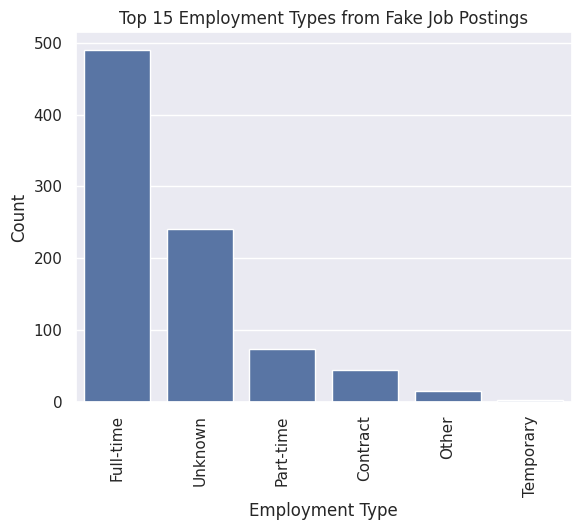

In [ ]:
sns.barplot(profile_fake.employment_type.value_counts().head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Employment Types from Fake Job Postings')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

In [ ]:
profile_real.employment_type.value_counts()

Full-time    11130
Unknown       3230
Contract      1480
Part-time      723
Temporary      239
Other          212
Name: employment_type, dtype: int64

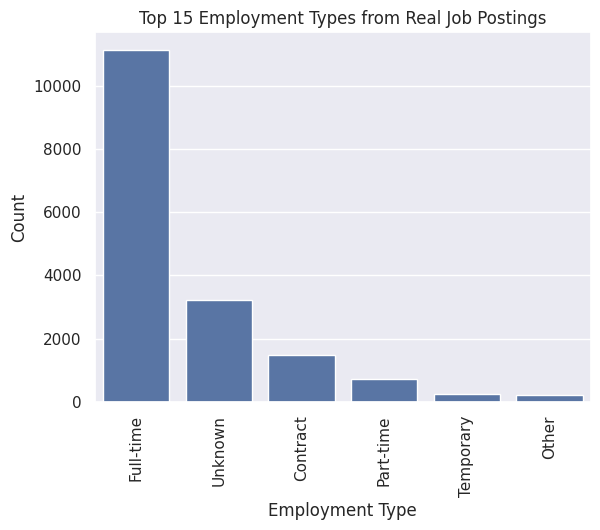

In [ ]:
sns.barplot(profile_real.employment_type.value_counts().head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Employment Types from Real Job Postings')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.show()

1. Full-time positions are prevalent in both fraudulent and real job postings, although they are more dominant in real job postings.
2. Unknown employment types are more common among fraudulent job postings compared to real job postings.
3. Part-time positions are less common overall, but they still appear in both fraudulent and real job postings.

In [ ]:
# analysis of the relationship between required_experience and fraudulent
profile_fake.required_experience.value_counts()

Unknown             435
Entry level         179
Mid-Senior level    113
Not Applicable       60
Associate            42
Director             17
Executive            10
Internship           10
Name: required_experience, dtype: int64

In [ ]:
profile_real.required_experience.value_counts()

Unknown             6615
Mid-Senior level    3696
Entry level         2518
Associate           2255
Not Applicable      1056
Director             372
Internship           371
Executive            131
Name: required_experience, dtype: int64

1. The designation "Unknown" predominates in both fraudulent and real job postings, indicating a lack of provided information regarding the required experience level.
2. There is a notable prevalence of Entry level positions in fraudulent job postings, suggesting a potential focus on attracting candidates with minimal experience.
3. Real job postings feature a broader range of experience levels, including Mid-Senior level positions, indicating a more diverse set of opportunities.

In [ ]:
# analysis of the relationship between industry and fraudulent
profile_fake.industry.value_counts().head(15)

unknown                            275
oil energy                         109
accounting                          57
hospital health care                51
marketing advertising               45
financial services                  35
information technology services     32
telecommunications                  26
consumer services                   24
real estate                         24
leisure travel tourism              21
health wellness fitness             15
hospitality                         14
computer networking                 12
staffing recruiting                  8
Name: industry, dtype: int64

In [ ]:
profile_real.industry.value_counts().head(15)

unknown                            4628
information technology services    1702
computer software                  1371
internet                           1062
education management                822
marketing advertising               783
financial services                  744
hospital health care                446
consumer services                   334
telecommunications                  316
retail                              218
oil energy                          178
construction                        155
real estate                         151
elearning                           137
Name: industry, dtype: int64

1. Both fraudulent and real job postings exhibit "Unknown" as the most common industry, suggesting a lack of specific industry information in a considerable number of postings.
2. Fraudulent postings tend to be more diverse across various industries, including oil and energy, accounting, and healthcare.
3. Real job postings are characterized by a broader representation across industries, with a notable emphasis on information technology services, computer software, and internet-related sectors.

In [ ]:
# analysis of the relationship between function and fraudulent
profile_fake.function.value_counts().head(15)

Unknown                   337
Administrative            119
Engineering               113
Customer Service           67
Sales                      41
Other                      32
Information Technology     32
Accounting/Auditing        29
Finance                    15
Business Development       13
Marketing                  10
Project Management         10
Human Resources             9
Management                  6
Financial Analyst           5
Name: function, dtype: int64

In [ ]:
profile_real.function.value_counts().head(15)

Unknown                   6118
Information Technology    1717
Sales                     1427
Engineering               1235
Customer Service          1162
Marketing                  820
Administrative             511
Health Care Provider       337
Design                     337
Education                  324
Management                 311
Other                      293
Business Development       215
Human Resources            196
Accounting/Auditing        183
Name: function, dtype: int64

1. Fraudulent postings tend to cover a broader spectrum of functions, with a notable presence in administrative, engineering, and customer service roles.
2. Real job postings also exhibit a wide representation across functions, with a significant focus on information technology, sales, engineering, and customer service roles.

In [ ]:
# analysis of the relationship between location and fraudulent
profile_fake.country.value_counts().head(15)

US         730
AU          40
GB          23
Unknown     19
MY          12
CA          12
QA           6
BH           5
IN           4
PL           3
TW           2
BR           1
SA           1
PH           1
AE           1
Name: country, dtype: int64

In [ ]:
profile_real.country.value_counts().head(15)

US         9926
GB         2361
GR          940
CA          445
DE          383
NZ          333
Unknown     327
IN          272
AU          174
PH          131
NL          127
BE          117
IE          114
SG           80
HK           77
Name: country, dtype: int64

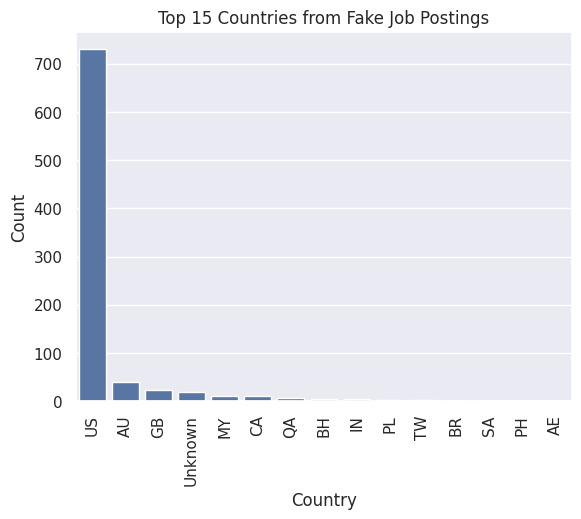

In [ ]:
sns.barplot(profile_fake.country.value_counts().head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Countries from Fake Job Postings')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

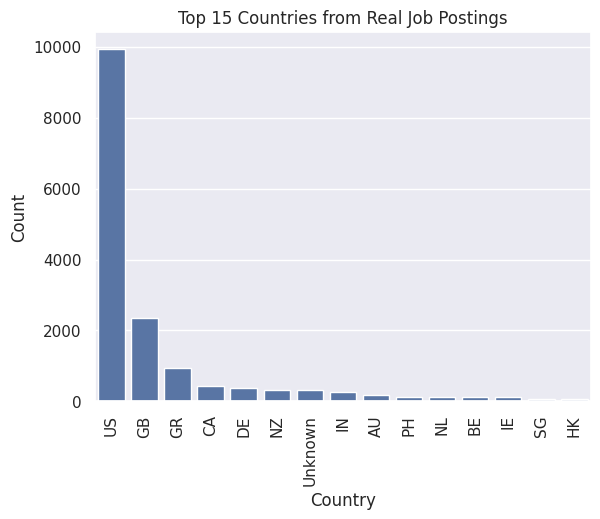

In [ ]:
sns.barplot(profile_real.country.value_counts().head(15))
plt.xticks(rotation=90)
plt.title('Top 15 Countries from Real Job Postings')
plt.xlabel('Country')
plt.ylabel('Count');

1. The US is the most common country in both fraudulent and real job postings, indicating a significant presence of job opportunities in the US job market.
2. While fraudulent postings span a smaller number of countries, real job postings encompass a broader international representation, including countries like Greece, Canada, Germany, New Zealand, and others.

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


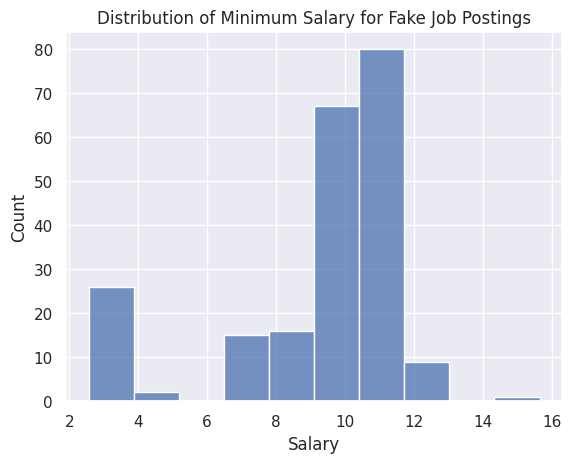

In [ ]:
# analysis of the relationship between salary and fraudulent
sns.histplot(np.log(profile_fake[profile_fake.min_salary != 'Unknown'].min_salary.apply(int)), bins=10)
plt.title('Distribution of Minimum Salary for Fake Job Postings')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [ ]:
profile_fake[profile_fake.min_salary != 'Unknown'].min_salary.apply(int).describe().apply(int)

count        222
mean       66411
std       420676
min            0
25%         7200
50%        30000
75%        50000
max      6266624
Name: min_salary, dtype: int64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


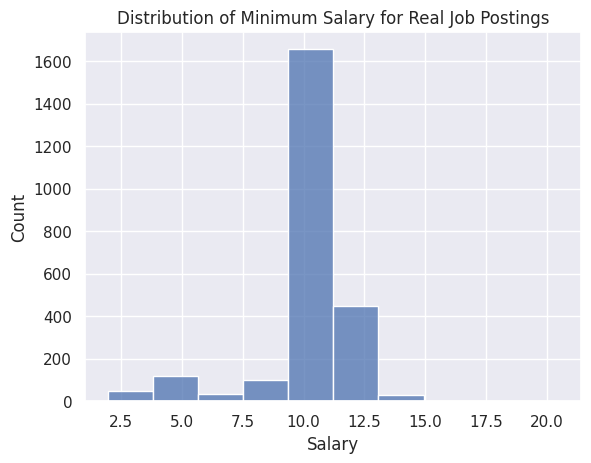

In [ ]:
sns.histplot(np.log(profile_real[profile_real.min_salary != 'Unknown'].min_salary.apply(int)), bins=10)
plt.title('Distribution of Minimum Salary for Real Job Postings')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [ ]:
profile_real[profile_real.min_salary != 'Unknown'].min_salary.apply(int).describe().apply(int)

count         2619
mean        553650
std       18430364
min              0
25%          18000
50%          36000
75%          60000
max      800000000
Name: min_salary, dtype: int64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


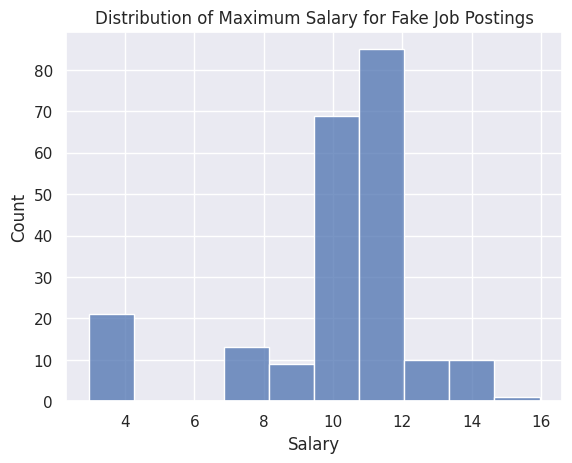

In [ ]:
sns.histplot(np.log(profile_fake[profile_fake.max_salary != 'Unknown'].max_salary.apply(int)), bins=10)
plt.title('Distribution of Maximum Salary for Fake Job Postings')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [ ]:
profile_fake[profile_fake.max_salary != 'Unknown'].max_salary.apply(int).describe().apply(int)

count        222
mean      159935
std       636509
min            0
25%        28000
50%        45000
75%        75000
max      8582080
Name: max_salary, dtype: int64

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


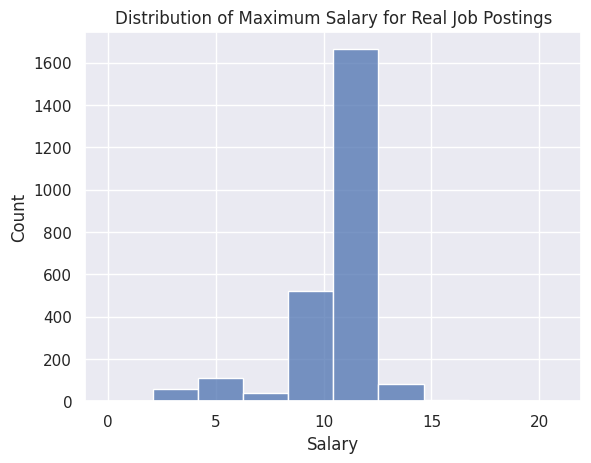

In [ ]:
sns.histplot(np.log(profile_real[profile_real.max_salary != 'Unknown'].max_salary.apply(int)), bins=10)
plt.title('Distribution of Maximum Salary for Real Job Postings')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [ ]:
np.log(profile_real[profile_real.max_salary != 'Unknown'].max_salary.apply(int).describe().apply(int))

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


count     7.870548
mean     13.673823
std      17.154120
min           -inf
25%      10.126631
50%      10.819778
75%      11.407565
max      20.905587
Name: max_salary, dtype: float64

###Comparison:

1. While the average minimum salary for fake job postings is lower than that of real job postings, the maximum salary appears to be higher in fake job postings.
2. The salary data for real job postings shows a wide variation, with a significant standard deviation and a logarithmic transformation indicating a diverse distribution.
3. Both fake and real job postings exhibit a wide range of salaries, indicating variability in compensation across different job opportunities.